 ####  Students Performance in Examinations Exploratory Data Analysis

Marks secured by students in High School in various subjects from the United States of America.

#### Aim

To understand the influence of various factors like economic, personal and social on the students performance
Inferences would be :
1. How to improve the students performance in each test ?
2. What are the major factors influencing the test scores ?
3. Effectiveness of test preparation course?
4. Other inferences



### Getting the system ready and Obtaining the data


In [1]:
# Import the required libraries: Pandas, Numpy, Matplotlib and  Seaborn

import pandas as pd  # For data munging, manipulations and preparation        
import numpy as np  # for numerical and mathematical calculations
import seaborn as sns # For statistical data visualization
import matplotlib.pyplot as plt  # For plotting variety of graphs(histograms, heatplots, lineplots
%matplotlib inline
import warnings                   # To ignore the warnings
warnings.filterwarnings("ignore")

In [2]:
import sklearn  ## Machine learning lIbrary
import featuretools as ft ## automated feature engineering library

Let us initialize the required values 
( we will use them later in the program )

we will set the minimum marks to 40 to pass in a exam

In [2]:
passmark = 40

In [3]:
# Let us load and read the data from the csv file then print the top 10 rows  to understand the various data columns.

df=pd.read_csv("StudentsPerformance.csv")
df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


### Understanding of the Data

In [4]:
# Check the instances(rows) and attributes(columns) in the dataset: Size and Dimension of the dataframe
df.shape
print("DataFrame Dimenisons:", df.shape)

DataFrame Dimenisons: (1000, 8)


In [9]:
# Concise Summary of the Data frame

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [12]:
# Checking the Column types and Count value

ctype = df.dtypes.reset_index()
ctype.columns = ["Count", "Column Type"]
ctype.groupby("Column Type").aggregate('count').reset_index()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
df['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

In [16]:
df['test preparation course'].value_counts()

none         642
completed    358
Name: test preparation course, dtype: int64

In [17]:
a=df['race/ethnicity'].value_counts()
a


group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

In [13]:
# Check the  Statistical Numerical Data Distribution Summary

df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [6]:
# Descriptive Statistics Summary of al columns:

df.describe(include='all')

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
count,1000,1000,1000,1000,1000,1000.00000,1000.000000,1000.000000
unique,2,5,6,2,2,NaN,NaN,NaN
top,female,group C,some college,standard,none,NaN,NaN,NaN
freq,518,319,226,645,642,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,66.08900,69.169000,68.054000
std,NaN,NaN,NaN,NaN,NaN,15.16308,14.600192,15.195657
min,NaN,NaN,NaN,NaN,NaN,0.00000,17.000000,10.000000
25%,NaN,NaN,NaN,NaN,NaN,57.00000,59.000000,57.750000
50%,NaN,NaN,NaN,NaN,NaN,66.00000,70.000000,69.000000
75%,NaN,NaN,NaN,NaN,NaN,77.00000,79.000000,79.000000


In [7]:
# Selecting randomly a sample from the data set

df.sample()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
169,female,group C,some college,free/reduced,completed,67,75,70


In [164]:
# Gives information on columns types and number of null values and their percentages

tab_info=pd.DataFrame(df.dtypes).T.rename(index={0:'column type'})
tab_info=tab_info.append(pd.DataFrame(df.isnull().sum()).T.rename(index={0:'null values (nb)'}))
tab_info=tab_info.append(pd.DataFrame(df.isnull().sum()/df.shape[0]*100)
                         .T.rename(index={0:'null values (%)'}))
tab_info

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total_Marks,Percentage,Math_PassStatus,Reading_PassStatus,Writing_PassStatus,OverAll_PassStatus,Grade
column type,object,object,object,object,object,int64,int64,int64,int64,float64,object,object,object,object,object
null values (nb),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
null values (%),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Data Preparation

This encompasses the activities to construct and clean the data set. 

### Missing Values Detection and Treatment

In [39]:
# Checking the  Missing Values

missing_df = df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['Column_Name', 'Missing_Count']
missing_df = missing_df[missing_df['Missing_Count']>0]
missing_df = missing_df.sort_values(by='Missing_Count')
missing_df

,Column_Name,Missing_Count


As seen above, there are no missing ( null ) values in this dataframe 

In [17]:
# code for checking the missing values

df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [21]:
# Checking the missing values

missing_df =df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['Column Name', 'Missing Values Count']
missing_df['Filling Factor (%)']=(df.shape[0]-missing_df['Missing Values Count'])/df.shape[0]*100
missing_df.sort_values('Filling Factor (%)').reset_index(drop = True)

,Column Name,Missing Values Count,Filling Factor (%)
0,gender,0,100.0
1,race/ethnicity,0,100.0
2,parental level of education,0,100.0
3,lunch,0,100.0
4,test preparation course,0,100.0
5,math score,0,100.0
6,reading score,0,100.0
7,writing score,0,100.0


In [23]:
# We check the number of values in the data set, which are None in the  Test Preparation Column.

len(df.loc[df["test preparation course"] == "none",:])

642

In [26]:
# In the test preparation column we bring only the first 10 of the data with no value.

df.loc[df["test preparation course"] == "none",:].head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
7,male,group B,some college,free/reduced,none,40,43,39
9,female,group B,high school,free/reduced,none,38,60,50
10,male,group C,associate's degree,standard,none,58,54,52
11,male,group D,associate's degree,standard,none,40,52,43
12,female,group B,high school,standard,none,65,81,73


In [33]:
# Check the Top 10 students in  the test preparation score

top_10t =df.sort_values(["test preparation course"], ascending=[True])[:10]
top_10t.sample(2)


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total_Marks,Percentage
762,male,group D,some high school,standard,completed,78,81,86,245,81.666667
365,male,group A,bachelor's degree,free/reduced,completed,49,58,60,167,55.666667


In [75]:
# selecting a Specific Number of Columns from the data set

new_col=df[["gender","race/ethnicity","parental level of education",  "Percentage", "Grade"]]
new_col.sample(3)


,gender,race/ethnicity,parental level of education,Percentage,Grade
122,female,group C,some college,91.333333,Grade A:
521,female,group C,associate's degree,87.000000,Grade A:
885,female,group C,associate's degree,72.666667,Grade B:


### Students Perfomance Analysis per Subject

In [37]:
# How many students passed in Mathematics Examination ?

df['Math_PassStatus'] = np.where(df['math score']<passmark, 'Failed', 'Passed')
df.Math_PassStatus.value_counts()

Passed    960
Fail       40
Name: Math_PassStatus, dtype: int64

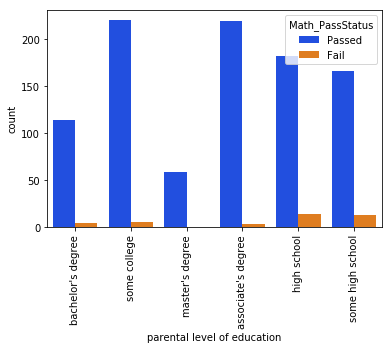

In [165]:
#  Seaborn Countplot Visualization

p = sns.countplot(x='parental level of education', data = df, hue='Math_PassStatus', palette='bright')
_ = plt.setp(p.get_xticklabels(), rotation=90)

In [43]:
# How many studends passed in the Reading Test ?

df['Reading_PassStatus'] = np.where(df['reading score']<passmark, 'Failed', 'Passed')
df.Reading_PassStatus.value_counts()

Passed    974
Failed     26
Name: Reading_PassStatus, dtype: int64

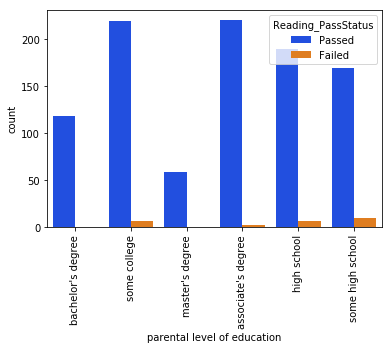

In [42]:
#  Seaborn Countplot Visualization

p = sns.countplot(x='parental level of education', data = df, hue='Reading_PassStatus', palette='bright')
_ = plt.setp(p.get_xticklabels(), rotation=90) 

In [45]:
  # How many students passed Writing Test ?
    
df['Writing_PassStatus'] = np.where(df['writing score']<passmark, 'Failed', 'Passed')
df.Writing_PassStatus.value_counts()

Passed    968
Failed     32
Name: Writing_PassStatus, dtype: int64

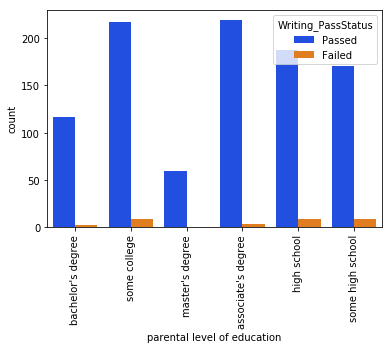

In [46]:
#  Seaborn Countplot Visualization

p = sns.countplot(x='parental level of education', data = df, hue='Writing_PassStatus', palette='bright')
_ = plt.setp(p.get_xticklabels(), rotation=90) 

### Students' Performance in alll the subjects

In [48]:
# Iet us check "How many students passed in all the subjects ?"

df['OverAll_PassStatus'] = df.apply(lambda x : 'Failed' if x['Math_PassStatus'] == 'Failed' or 
                                    x['Reading_PassStatus'] == 'Failed' or x['Writing_PassStatus'] == 'Failed' else 'Passed', axis =1)

df.OverAll_PassStatus.value_counts()    

Passed    967
Failed     33
Name: OverAll_PassStatus, dtype: int64

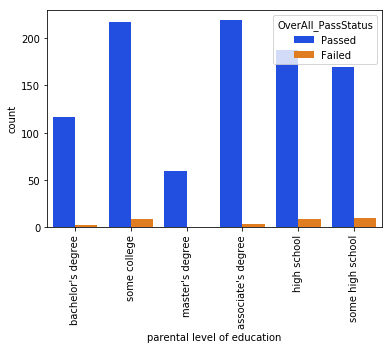

In [49]:
#  Seaborn Countplot Visualization

p = sns.countplot(x='parental level of education', data = df, hue='OverAll_PassStatus', palette='bright')
_ = plt.setp(p.get_xticklabels(), rotation=90)

In [5]:
# Find the Total Marks Per Student then display  sample data for two students

df["Total_Marks"]=df["math score"]+df["reading score"]+df["writing score"]
df.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total_Marks
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247


In [6]:
#  Find the Percentage of Marks per Student

df["Percentage"]=df["Total_Marks"]*1/3
df.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total_Marks,Percentage
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


Text(0.5, 1.0, "General Statistics of Students' Performance")

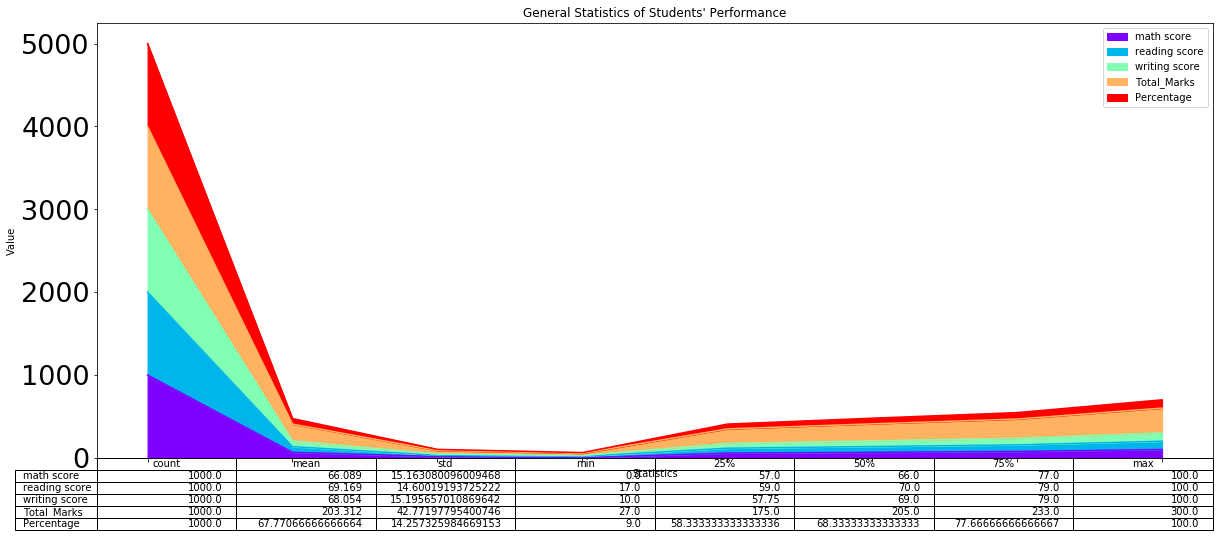

In [7]:
#   Visualziing the Statistical Distribution of the Variables

df.describe().plot(kind = "area",fontsize=27, figsize = (20,8), table = True,colormap="rainbow")
plt.xlabel('Statistics',)
plt.ylabel('Value')
plt.title("General Statistics of Students' Performance")

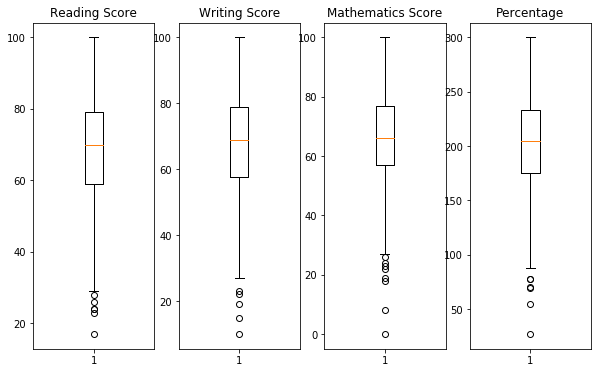

In [13]:
plt.figure(1, figsize=(10,6))
plt.subplot(1,4, 1)
plt.boxplot(df['reading score'])
plt.title('Reading Score')

plt.subplot(1,4,2)
plt.boxplot(df['writing score'])
plt.title('Writing Score')

plt.subplot(1,4,3)
plt.boxplot(df['math score'])
plt.title('Mathematics Score')

plt.subplot(1,4,4)
plt.boxplot(df['Total_Marks'])
plt.title('Percentage')

plt.show()

Above box plot shows us the min,median and max values for GRE,TOEFL,University rating and CGPA for the dataset.

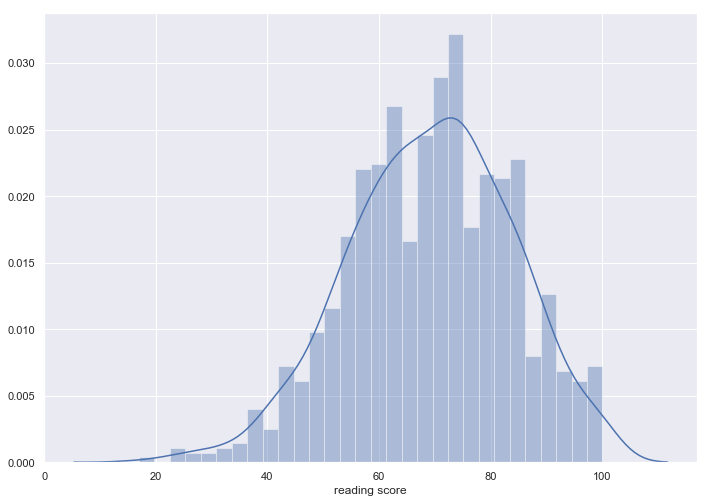

In [13]:
#  Plotting the distribution of the target variable
# Using  the displot function

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(df['reading score'], bins=30)
plt.show()

In [166]:
# Top 10  Best Performed Students Overall

top_10 =df.sort_values(["Percentage"], ascending=[False])[:10]
top_10

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total_Marks,Percentage,Math_PassStatus,Reading_PassStatus,Writing_PassStatus,OverAll_PassStatus,Grade
916,male,group E,bachelor's degree,standard,completed,100,100,100,300,100.000000,Passed,Passed,Passed,Passed,Grade A:
458,female,group E,bachelor's degree,standard,none,100,100,100,300,100.000000,Passed,Passed,Passed,Passed,Grade A:
962,female,group E,associate's degree,standard,none,100,100,100,300,100.000000,Passed,Passed,Passed,Passed,Grade A:
114,female,group E,bachelor's degree,standard,completed,99,100,100,299,99.666667,Passed,Passed,Passed,Passed,Grade A:
179,female,group D,some high school,standard,completed,97,100,100,297,99.000000,Passed,Passed,Passed,Passed,Grade A:
712,female,group D,some college,standard,none,98,100,99,297,99.000000,Passed,Passed,Passed,Passed,Grade A:
165,female,group C,bachelor's degree,standard,completed,96,100,100,296,98.666667,Passed,Passed,Passed,Passed,Grade A:
625,male,group D,some college,standard,completed,100,97,99,296,98.666667,Passed,Passed,Passed,Passed,Grade A:
903,female,group D,bachelor's degree,free/reduced,completed,93,100,100,293,97.666667,Passed,Passed,Passed,Passed,Grade A:
149,male,group E,associate's degree,free/reduced,completed,100,100,93,293,97.666667,Passed,Passed,Passed,Passed,Grade A:


Let us Assign the Grades

Grading System

Above 80 = Grade A

70 to 80 = Grade B

60 to 70 = Grade C

50 to 60 = Grade D

40 to 50 = Grade E

Below 40 = Grade F ( Means Fail )


In [66]:
def GetGrade(Percentage, OverAll_PassStatus):
    if ( OverAll_PassStatus == 'Failed'):
        return 'Failed'    
    if ( Percentage >= 80 ):
        return 'Grade A:'
    if ( Percentage >= 70):
        return 'Grade B:'
    if ( Percentage >= 60):
        return 'Grade C:'
    if ( Percentage >= 50):
        return 'Grade D:'
    if ( Percentage >= 40):
        return 'Grade E:'
    else: 
        return 'Failed'

df['Grade'] = df.apply(lambda x : GetGrade(x['Percentage'], x['OverAll_PassStatus']), axis=1)

df.Grade.value_counts()

Grade B:    261
Grade C:    256
Grade A:    198
Grade D:    182
Grade E:     67
Failed       36
Name: Grade, dtype: int64

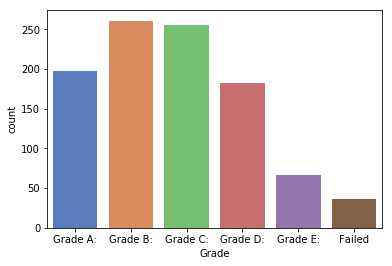

In [72]:
## Lets show the grades obtained in an order
sns.countplot(x="Grade", data = df, order=['Grade A:','Grade B:','Grade C:','Grade D:','Grade E:','Failed'],  palette="muted")
plt.show()

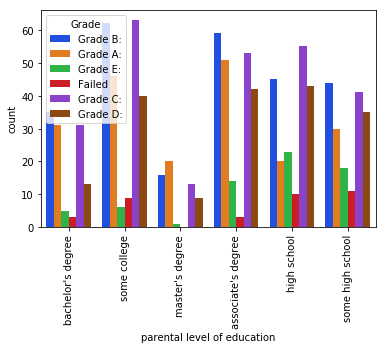

In [73]:
#  Seaborn Countplot Visualization

p = sns.countplot(x='parental level of education', data = df, hue='Grade', palette='bright')
_ = plt.setp(p.get_xticklabels(), rotation=90) 

### Univariate, Bivariate and Multivariate Analysis

###  Univariate Analysis

### One Way Frequency Tables // Cross Tabs

In [123]:
# One Way Frequency Tables // Cross Tabs

my_tab = pd.crosstab(index=df["parental level of education"],  # Make a crosstab
                              columns="Count_Total")      # Name the count column

my_tab

col_0,Count_Total
parental level of education,
associate's degree,222
bachelor's degree,118
high school,196
master's degree,59
some college,226
some high school,179


In [124]:
# Gender Crosstab 

pd.crosstab(index=df["gender"],  # Make a crosstab
                      columns="Count_Total")      # Name the count column

col_0,Count_Total
gender,
female,518
male,482


In [127]:
# Cross table of Gender vs Parental Level of Education

tab1= pd.crosstab(index=df["gender"], 
                           columns=df["parental level of education"])

tab1.index= ["Female","Male"]

tab1.head(2)

parental level of education,associate's degree,bachelor's degree,high school,master's degree,some college,some high school
Female,116,63,94,36,118,91
Male,106,55,102,23,108,88


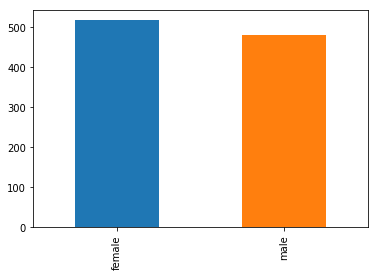

In [25]:
# Box plot showing the Gender distribution

df['gender'].value_counts().head(10).plot.bar()

You can also use  Seaborn Countplots for Univariate Analysis of the variables

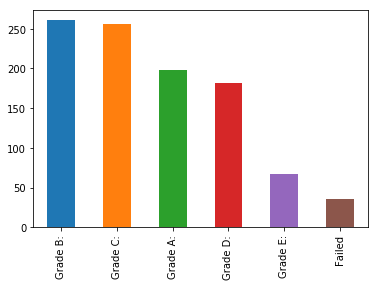

In [79]:
# Box plot showing the Grades Distribution

df['Grade'].value_counts().head(10).plot.bar()

## Bivariate  Analysis

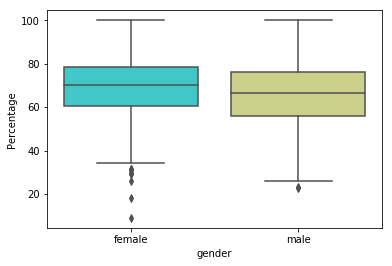

In [78]:
# Categorical Variable vs Numerical Continuous Variable

# Box plot Visualization
# Comparing the top 10 students performance  against the Gender column

sns.boxplot(x='gender',y='Percentage',data=df, palette='rainbow')

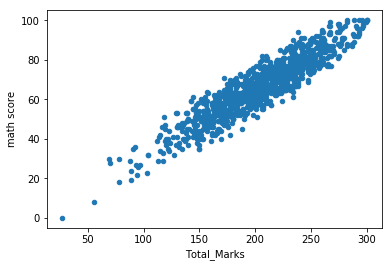

In [90]:
# Continous Numerical Variable  vs Continuous Numerical Variable\
# Scatter Plot Visualization
# Comparing the Overall students performance against the Mathematics Score


df.plot(kind="scatter",x="Total_Marks",  y="math score")

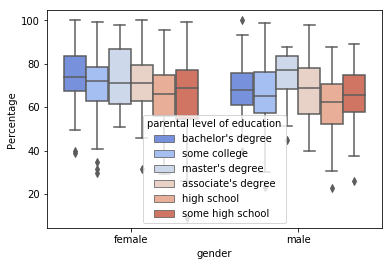

In [93]:
# Categorical Variable vs Categorical Variable Vs Numerical Continuous Variable

sns.boxplot(x="gender",y="Percentage",hue="parental level of education",data=df, palette="coolwarm")

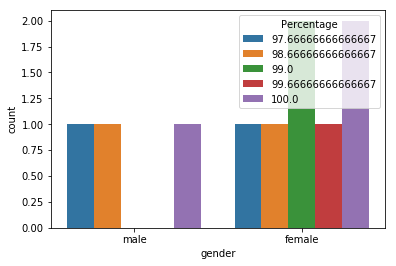

In [29]:
sns.countplot(x='gender', hue="Percentage", data=top_10)

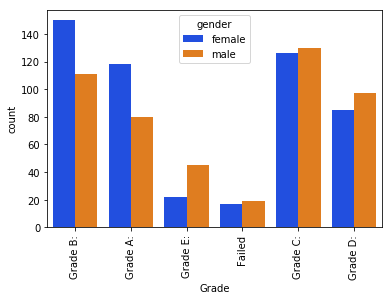

In [159]:
# Comparing the Overall Students Performance against their Gender
# Countplot Visualization


p = sns.countplot(x='Grade', data = df, hue='gender', palette='bright')
_ = plt.setp(p.get_xticklabels(), rotation=90) 

Female students performed better Compared to the male counterparts

Males registered a larger number of students who scored Grade D and below with the larger share of failed students.

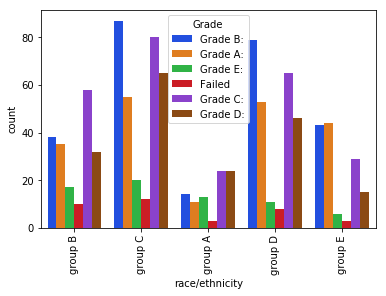

In [157]:
# Comparing ALL the Students Performance against their Race/ Ethnicity
# Countplot Visualization


p = sns.countplot(x='race/ethnicity', data = df, hue='Grade', palette='bright')
_ = plt.setp(p.get_xticklabels(), rotation=90) 

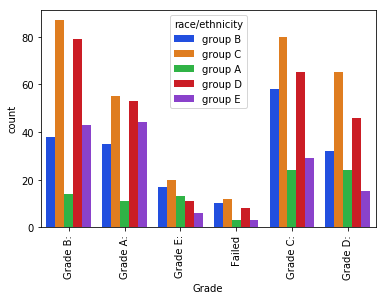

In [160]:
# Comparing ALL the Students Performance against their Race/ Ethnicity
# Countplot Visualization


p = sns.countplot(x='Grade', data = df, hue='race/ethnicity', palette='bright')
_ = plt.setp(p.get_xticklabels(), rotation=90)

race/ethnicity Groups C and D performed well while race/ethnicity B,A and E Performed poorly

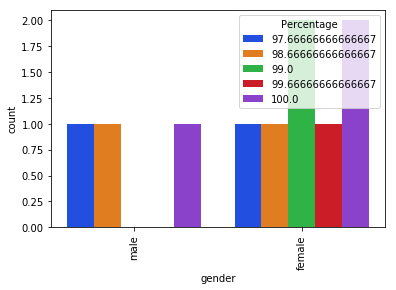

In [97]:
# Comparing the Top 10  Students Performance against their Gender
# Countplot Visualization

p = sns.countplot(x='gender', data = top_10, hue='Percentage', palette='bright')
_ = plt.setp(p.get_xticklabels(), rotation=90) 

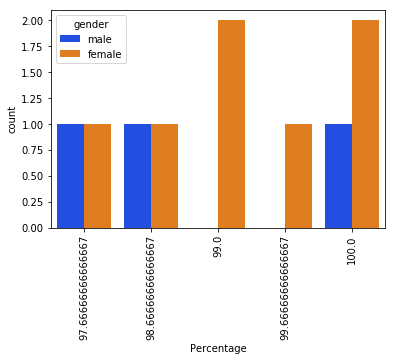

In [161]:
# Comparing the Top 10  Students Performance against their Gender
# Countplot Visualization

p = sns.countplot(x='Percentage', data = top_10, hue='gender', palette='bright')
_ = plt.setp(p.get_xticklabels(), rotation=90) 

Female students featured greatly in the top 10 list

### Effectiveness of test preparation course?

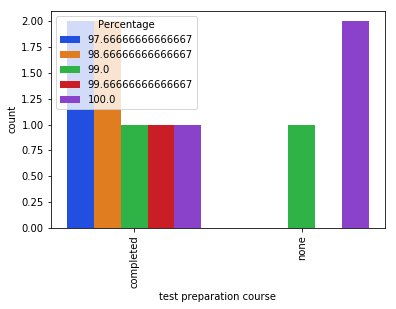

In [116]:
# Comparing the Top 10  Students Performance against the Test Preparation Course Column

# Countplot Visualization


p = sns.countplot(x='test preparation course', data =top_10, hue='Percentage', palette='bright')
_ = plt.setp(p.get_xticklabels(), rotation=90) 

Majority of the students in the top 10 list had succesfully completed the Test Preparation Course

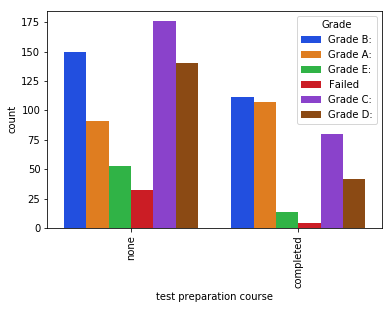

In [158]:
# Comparing All the Students Performance against the Test Preparation Course Column

# Countplot Visualization


p = sns.countplot(x='test preparation course', data =df, hue='Grade', palette='bright')
_ = plt.setp(p.get_xticklabels(), rotation=90) 

A good number of students who did not sit for the Test Preparation Course failed

 ## The Lunch Factor

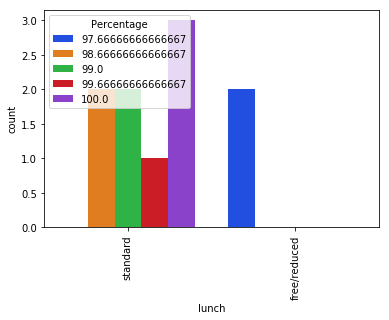

In [156]:
# Comparing the Top 10  Students Performance against the Lunch Column

# Countplot Visualization


p = sns.countplot(x='lunch', data =top_10, hue='Percentage', palette='bright')
_ = plt.setp(p.get_xticklabels(), rotation=90) 

All the students in the top 10 list took standard lunch.

### Two Way Contigency Frequency Tables

In [155]:
# Cross Table of Gender vs Grades Scored by the students

tab1= pd.crosstab(index=df["gender"], 
                           columns=df["Grade"])

tab1.index= ["Female","Male"]

tab1.head()

Grade,Failed,Grade A:,Grade B:,Grade C:,Grade D:,Grade E:
Female,17,118,150,126,85,22
Male,19,80,111,130,97,45


In [146]:
# Cross table of Parental Level of Education vs Overall Grade scored by every student

tab1= pd.crosstab(index=df["parental level of education"], 
                           columns=df["Grade"])

tab1.index= ["some high school","associate's degree","bachelor's degree","high school","master's degree","some college"]

tab1.head(6)

Grade,Failed,Grade A:,Grade B:,Grade C:,Grade D:,Grade E:
some high school,3,51,59,53,42,14
associate's degree,3,31,35,31,13,5
bachelor's degree,10,20,45,55,43,23
high school,0,20,16,13,9,1
master's degree,9,46,62,63,40,6
some college,11,30,44,41,35,18


In [150]:
# Cross Table of Race/ Ethnicity vs Grades Scored by the students

tab1= pd.crosstab(index=df["race/ethnicity"], 
                           columns=df["Grade"])

tab1.index= ["group B","group A","group C","group D","group E"]

tab1.head(5)

Grade,Failed,Grade A:,Grade B:,Grade C:,Grade D:,Grade E:
group B,3,11,14,24,24,13
group A,10,35,38,58,32,17
group C,12,55,87,80,65,20
group D,8,53,79,65,46,11
group E,3,44,43,29,15,6


In [154]:
# Cross Table of Lunch vs Grades Scored by the students

tab1= pd.crosstab(index=df["lunch"], 
                           columns=df["Grade"])

tab1.index= ["standard","free/reduced"]

tab1.head(2)

Grade,Failed,Grade A:,Grade B:,Grade C:,Grade D:,Grade E:
standard,27,39,71,90,94,34
free/reduced,9,159,190,166,88,33
